testing lang

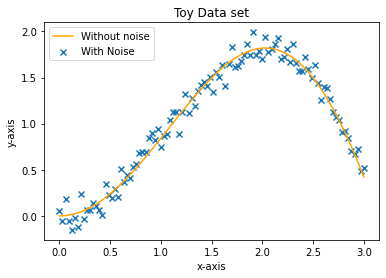

In [15]:
import numpy as np
import matplotlib.pyplot as plt
seednumber=1234
np.random.seed(seednumber)

noise=np.random.normal(0,0.1,100) #Create the noise array
x_array=np.linspace(0,3,100) #Create array for the x-values(0<=x<=3)

def func(x):
    #Function that returns f(x) without noise
    return(x*np.sin(x))
y_array=func(x_array)
plt.scatter(x_array,y_array+noise, label="With Noise",marker="x")
plt.plot(x_array,y_array, label="Without noise",color="orange")
plt.ylabel('y-axis')
plt.xlabel('x-axis')
plt.title("Toy Data set")
plt.legend()
plt.show()



This Part splits the Data into Three Parts (Training set, testing set, and cross validation set)

Train: 50; Test: 25; Cross Validation: 25
Train: 50; Test: 25; Cross Validation: 25


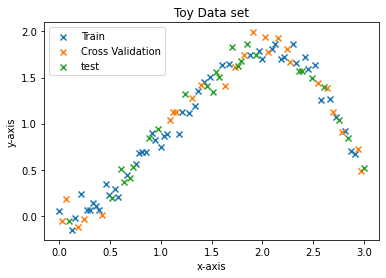

In [16]:
from sklearn.model_selection import train_test_split
x=x_array
y=y_array+noise
x_extra,x_train,y_extra,y_train=train_test_split(x,y,random_state=42,train_size=0.5,test_size=0.5)
x_test,x_cv,y_test,y_cv=train_test_split(x_extra,y_extra,random_state=42,train_size=0.5,test_size=0.5)
print(f"Train: {len(x_train)}; Test: {len(x_test)}; Cross Validation: {len(x_cv)}")
print(f"Train: {len(y_train)}; Test: {len(y_test)}; Cross Validation: {len(y_cv)}")

plt.scatter(x_train,y_train, label="Train",marker="x")
plt.scatter(x_cv,y_cv, label="Cross Validation",marker="x")
plt.scatter(x_test,y_test, label="test",marker="x")
plt.ylabel('y-axis')
plt.xlabel('x-axis')
plt.title("Toy Data set")
plt.legend()
plt.show()

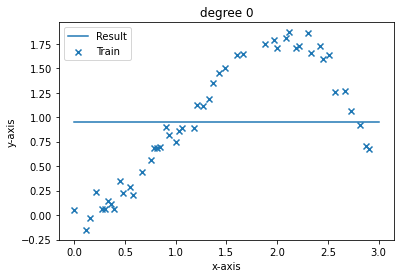

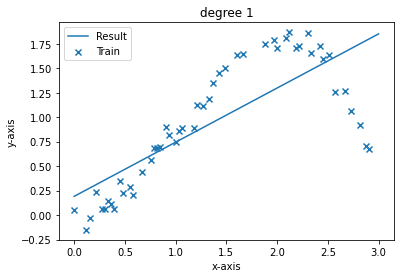

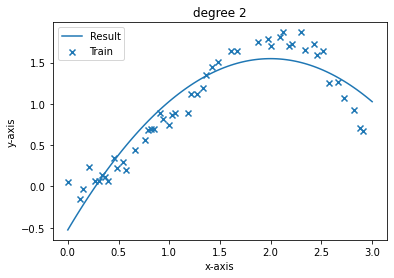

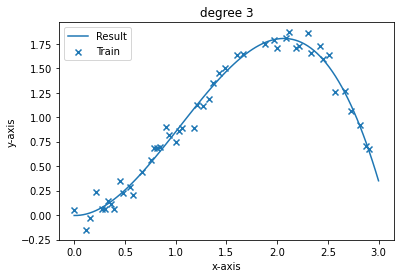

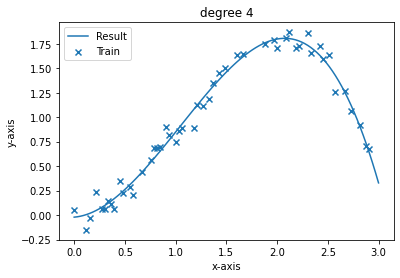

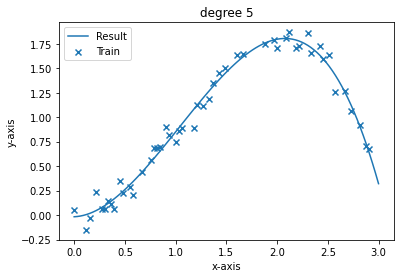

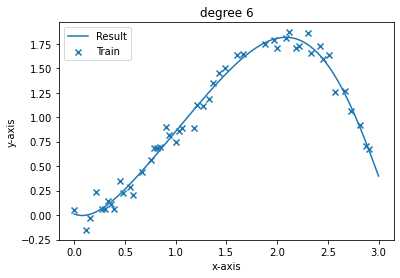

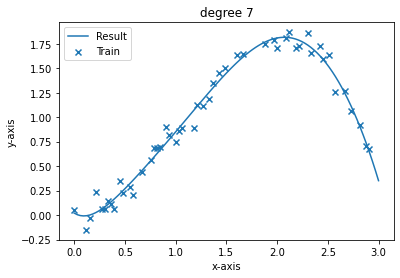

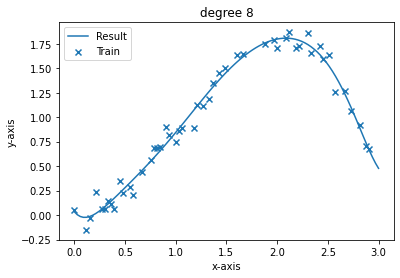

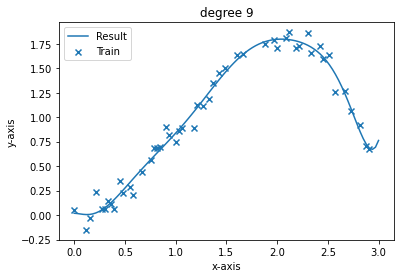

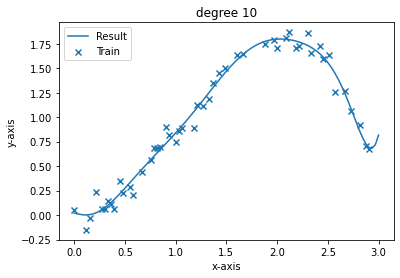

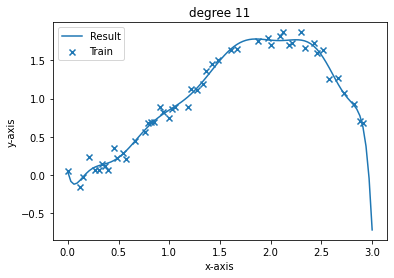

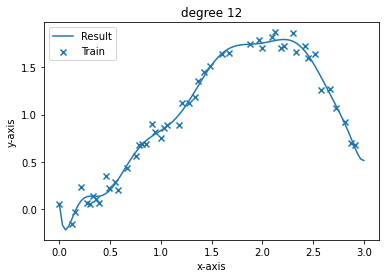

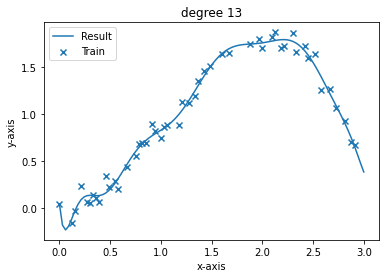

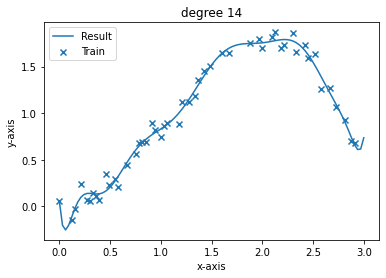

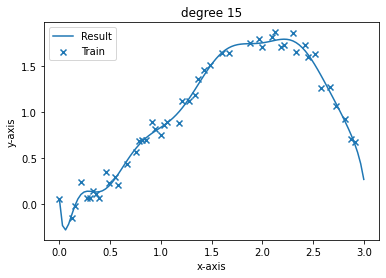

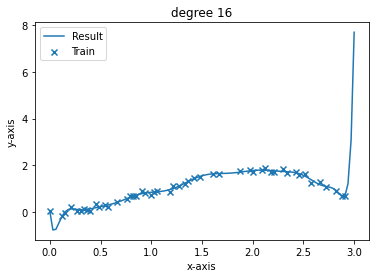

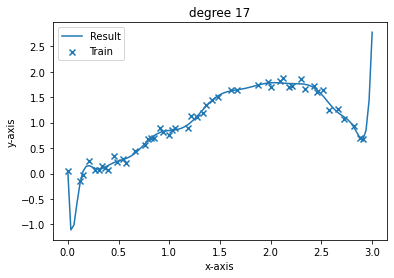

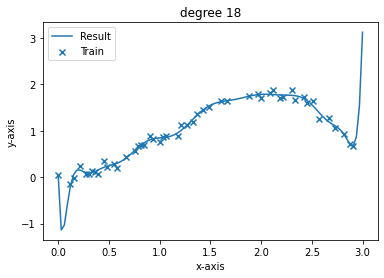

c:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


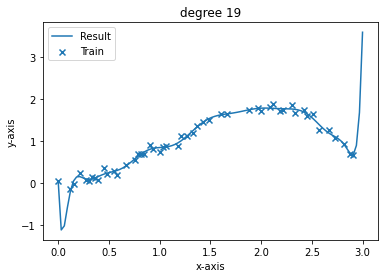

c:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


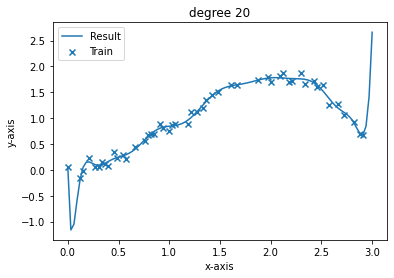

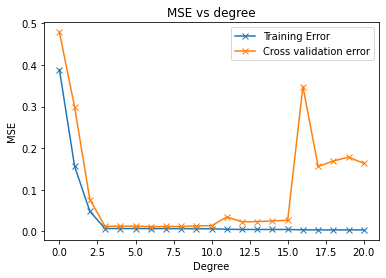

Error template:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Training Error:[0.3883904545031009, 0.15616470891912357, 0.04831793915427325, 0.007014356684500447, 0.006983085196966945, 0.006980965735495486, 0.006863465304884023, 0.006843078483904525, 0.006767371350391379, 0.00657386277214948, 0.00657057920030362, 0.005221155406313935, 0.004783178330569596, 0.0047806261562991954, 0.004772138445891842, 0.0047650961514889255, 0.0038899786377585345, 0.0036896940441640148, 0.0036890582352371113, 0.0036876775074215005, 0.0036866225343596404]


In [21]:
max_degree=20
error_template=np.arange(max_degree+1)
training_error=[ ]
cv_error=[ ]
test_error=[ ]
for i in range(max_degree+1):
    degree=5 # degree for polyfit
    degree=i
    a=np.polyfit(x_train,y_train,degree) # gives the coefficients of the polyfit
    b=np.poly1d(a) # converts a poly to function
    training_error.append((np.sum((y_train-b(x_train))**2))/len(x_train))
    cv_error.append((np.sum((y_cv-b(x_cv))**2))/len(x_cv))
    test_error.append((np.sum((y_test-b(x_test))**2))/len(x_test))
    plt.plot(x_array,b(x_array),label="Result")
    plt.scatter(x_train,y_train, label="Train",marker="x")
    #plt.scatter(x_cv,y_cv, label="Cross Validation",marker="x")
    #plt.scatter(x_test,y_test, label="test",marker="x")
    plt.ylabel('y-axis')
    plt.xlabel('x-axis')
    plt.title("degree "+str(i))
    plt.legend()
    plt.show()

plt.plot(error_template,training_error,label="Training Error", marker='x')
plt.plot(error_template,cv_error,label="Cross validation error", marker='x')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.title('MSE vs degree')
plt.legend()
plt.show()
print(f"Error template:{error_template}")
print(f"Training Error:{training_error}")